# Abstract 

Tubelights work by the emission of electrons at the cathode that undergo accelecration due to an applied electric field and excite atoms which emit photons during subsequent relaxation. Thus, models of tubelights can be built efficiently and accurately using Python with the aid of libraries such as numpy and scipy that enable one to visualise the working of this device using intensity plots and phase spaces.

# Introduction 

The tubelight is modeled as a one dimensional two terminal device with the ends being the cathode and the anode. Electrons are emitted at the anode and accelerate under an applied uniform electric field $E_0$ with an acceleration fo $1ms^{-2}$. When they reach a critical velocity $u_0$ they can undergo fruitful collisions with atoms that get excited and relax immediately to emit photons. Electrons that reach the anode are lost. This model is simulated for $nk$ turns, each beginning with an injection of electrons. The injection of electrons is modeled as follows as a normally distributed random variable.
\begin{equation}
m = N + Msig \cdot X
\end{equation}
where X is a normally distributed random variable. Thus 
\begin{align}
E(m) &=N + Msig \cdot E(X) = N\\
Var(m) &= Msig^2Var(X)\\
\end{align}
Also $E(X)$ is chosen to be $0$. The integer part of $m$ is chosen to be the number of electrons injected. Msig determines the variance of the random variable m.

# Code and results

The necessary libraries are imported and the default size for images is set.

In [37]:


from __future__ import division
% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import numpy as np
import sys
size=(10,8)


In [38]:
# defining the necessary functions

The default parameters are set as given below. Alternately the same can be taken from commandline arguments. The default length of the tube is taken to be $n=100$ units. Further, the probability that a sufficiently energitic electron undergoes a collision in a turn is given by $p$. 

In [39]:
# defining the constants 

# defaults

n= 100
M= 5
nk= 500
u0= 7
p= 0.5
Msig=2

In [40]:
# # considering the command line arguments
# if len(sys.argv)>0:
#     n= int(sys.argv[1])
#     M= int(sys.argv[2])
#     nk= int(sys.argv[3])
#     u0= int(sys.argv[4])
#     p= int(sys.argv[5])

# Edit this
The length list, in which each element represents one electron, is made sufficiently large. Other arrays are defined as follows
\begin{array}{c c c}
xx &-& electron position
u &-& electron velocity
dx &-& electron displacement in one turn
I &-& list of positions of every photon ever emitted
X &-& list of positions of electrons that existed at the end of every turn
V &-& the electron velocities corresponding to X

\end{array}

In [41]:
length= n*M # shouldn't it be nk*M?

# electron information

xx= np.zeros((length))   # electron position
u= np.zeros((length))    # electron velocity
dx= np.zeros((length))   # disp. in current turn

# extra info i don't really understand why i'm defining

I=[]
X=[]
V=[]
            

The code does the following-
 - ii finds the positions of electrons in the array xx which exist. $0$ in the xx array indicates the non-existence of an electron. Each existing electron undergoes motion according to the equations
\begin{align}
dx &= u_0t + \frac{1}{2}at^2\\
u &= u_0 + at\\
\end{align}
 - Due to this motion, some electrons might reach the anode and get absorbed. Correspondingly, their xx, u, dx values are set to zero. Which basically translates to their disappearance from our simulation universe.
 - Some electons obtain critical velocity $u_0$. Of these a few undergo collisions leading to immediate photon emission. This is modeled as a uniform random variable. Each energitic electron is assigned a random number (following a uniform distribution) and each electron collides if this number is lesser than $p$ which means the probability of a collsiion is $p$.
 - The velocities of these colliding electrons are set to zero as they lose all their energy in the collision. Since the collision might occur at any position betweet $x_i$ and $x_{i+1}$ (where $x_i$ is the position of some colliding electron corresponding to the $i^{th}$ turn) the new position is updated by subtracting some random fraction of the displacement that had been added to the position of the colliding electron in that turn.
 - The positions where the collisions occur are appended to the list $I$. 
 - New electrons are generated as explained in Section 1 and fill the empty positionsin the xx lists.

In [42]:
%%time
ii= np.where(xx>0) 
for _ in range(0,nk):
# to find where electrons are active
   
    dx[ii]= u[ii]+0.5
    xx[ii]= xx[ii]+dx[ii]
    u[ii]= u[ii]+1
    anode= np.where(xx>n)
    xx[anode]= 0
    dx[anode]= 0
    u[anode]= 0
    kk= np.where(u>u0) # electrons with energy
    ll= np.where(np.random.random(len(kk[0]))>p)
    kl= np.array(kk)[0][ll]  # which electrons will ionize
    u[kl]= 0
    rho= np.random.random(1)[0]
    xx[kl]= xx[kl]- dx[kl]*rho # minus cos xx has already been updated with an addition of dx in the loop
    I.extend(xx[kl])
    m= int(M + Msig*np.random.randn()) # mean  5 standard deviation 2
    new= np.where(xx==0)
    xx[new[0][:m]]=1
    ii= np.where(xx>0)
    X.extend(xx[ii])
    V.extend(u[ii])
  
    
    

    

CPU times: user 76 ms, sys: 0 ns, total: 76 ms
Wall time: 72.9 ms


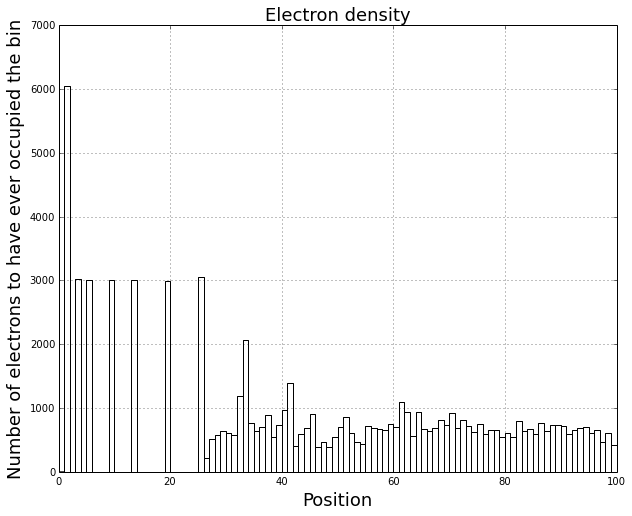

In [43]:
plt.figure(0,figsize=size)
plt.title("Electron density",fontsize=18)
plt.xlabel("Position",fontsize=18)
plt.ylabel("Number of electrons to have ever occupied the bin",fontsize=18)
plt.grid(True)
plt.hist(X,np.arange(0,101,1),color="white")
plt.show()    
plt.close()

The following histogram shows I vs position. This is a representation of the average value of the number of photons emitted between any two consecutive integral positions along hte tubelight and thus a representation of the average intensity.

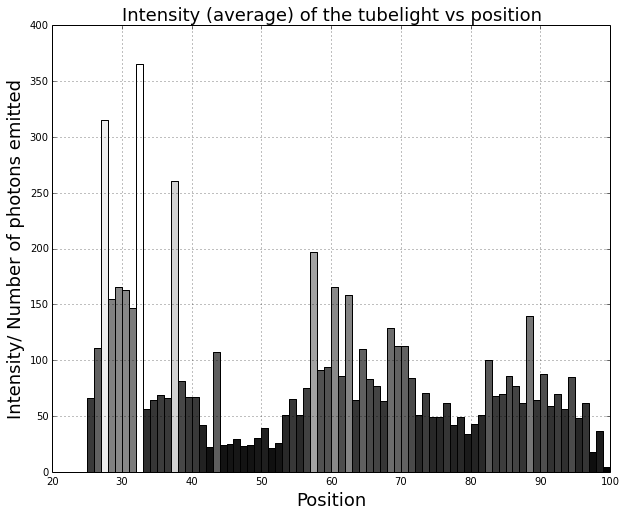

In [44]:
plt.figure(1,figsize=size)
plt.title("Intensity (average) of the tubelight vs position", fontsize=18)
plt.xlabel("Position", fontsize=18)
plt.ylabel("Intensity/ Number of photons emitted",fontsize=18)
plt.grid(True)
ret=plt.hist(I,np.arange(0,101,1),color="white")
vals=ret[0]
vals=1-(vals/max(vals))
norm = colors.Normalize(vals.min(), vals.max())
for thisfrac, thispatch in zip(vals, ret[2]):
    color = cm.Greys(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.show()    
plt.close()  

We plot the phase space of the electrons and also make a table of the centers of the bins and the intensity (number of photons) values.

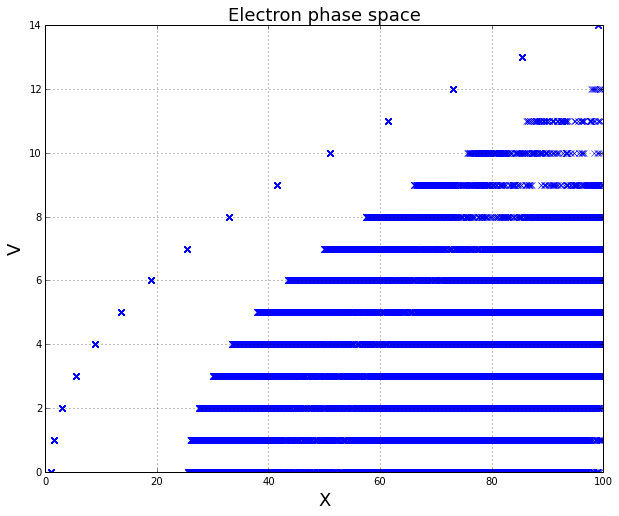

In [45]:
plt.figure(2,figsize=size)
plt.xlabel("X",fontsize=18)
plt.title("Electron phase space",fontsize=18)
plt.ylabel("V",fontsize=18)
plt.grid(True)
plt.plot(X,V,"bx")
plt.show() 
plt.close()

The following is a 2D extension of the one dimensional model wherein the intensity value along $y$ axis has been kept the same at a given $x$.

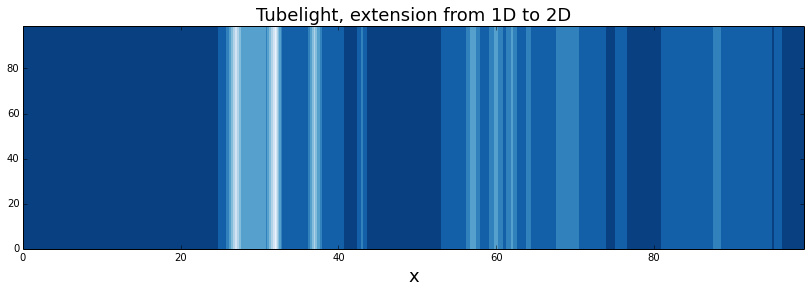

In [46]:
intensity=np.array([ret[0]]*100)
y,x=np.meshgrid(ret[1][:-1],ret[1][:-1])
plt.figure(figsize=(14,4))
plt.contourf(y,x,-intensity,cmap=cm.Blues)
plt.title("Tubelight, extension from 1D to 2D", fontsize=18)
plt.xlabel("x", fontsize=18)
plt.show()
plt.close()

In [47]:
bins=ret[1]
bins= 0.5*(bins[0:-1]+bins[1:])
print ("Intensity data \n")
print ("xpos     count")
for i in range(len(bins)):
    if bins[i]<10:
        print str(bins[i])+"       "+str(ret[0][i])
    else:
        print str(bins[i])+"      "+str(ret[0][i])


Intensity data 

xpos     count
0.5       0.0
1.5       0.0
2.5       0.0
3.5       0.0
4.5       0.0
5.5       0.0
6.5       0.0
7.5       0.0
8.5       0.0
9.5       0.0
10.5      0.0
11.5      0.0
12.5      0.0
13.5      0.0
14.5      0.0
15.5      0.0
16.5      0.0
17.5      0.0
18.5      0.0
19.5      0.0
20.5      0.0
21.5      0.0
22.5      0.0
23.5      0.0
24.5      0.0
25.5      66.0
26.5      111.0
27.5      315.0
28.5      155.0
29.5      166.0
30.5      163.0
31.5      147.0
32.5      365.0
33.5      56.0
34.5      64.0
35.5      69.0
36.5      66.0
37.5      261.0
38.5      81.0
39.5      67.0
40.5      67.0
41.5      42.0
42.5      22.0
43.5      107.0
44.5      24.0
45.5      25.0
46.5      29.0
47.5      23.0
48.5      24.0
49.5      30.0
50.5      39.0
51.5      21.0
52.5      26.0
53.5      51.0
54.5      65.0
55.5      51.0
56.5      75.0
57.5      197.0
58.5      91.0
59.5      94.0
60.5      166.0
61.5      86.0
62.5      158.0
63.5      64.0
64.5      110.0
65.5 

# Discussion and Conclusion-

The population plot of Figure 1 indicates the number of electrons that have been at a given position during the simulation. Since all the electrons start at the same point the first bin has the highest peak. This is followed by $x\approx25$ which is where most electrons have the energy necessary for ionisation. 

However the plot of Figure 2 is of far greater interest. It is effectively a plot of the number of electron atom collisions or the number of photons emitted at a given point or in a given bin. Since most of the electrons have insufficent energy for the first 20 - 25 units or so, there are no bars in this region. However most of the electrons gain sufficient energy by 25 (for the given defaults), and thus cause photon emission. Thus there is a huge peak at this point. Electrons that don't suffer collisions move on and perhaps do so at later stages contributing to the further bars. The next set of peaks is noticed at around 60, which incidentally happens to be nearly twice the initial value of position of the first peak. This could probably be due to the face that  a majority of the electrons that suffered  collisions at the position of the first peak have gained enought energy for a second set of collisions.

The phase space further adds insight. The phase space is the set of all possible states of a system. In this case, it is evident that no high velocity, low position states are present. This arises from the fact that for all low valus of position, until the first peak in intensity, the velocity of the electrons is only increasing and there are no collisions. Once the electrons have sufficient energy, they begin to suffer collisions which means they end up with zero velocity at multiple values of X and similarly at higher values of velocity for other positions. This means that a multitude of combinations of $X_i$ and $V_i$ are possible which is made obvious by the phase space plot.

To conclude, the various scientific python libraries have been made use of effectively to model what is a fairly complex situation which inherently involves some randomness. Further the intensity distribution of the tube is studied and found to match expectations.